# Apple 주식 가격 예측

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [32]:
apple_path = '/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/apple_stock.csv'

df = pd.read_csv(apple_path)

# date 타입 오브젝트로 되어있음 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2265 non-null   float64
 4   Close      2265 non-null   float64
 5   Volume     2265 non-null   float64
 6   Adj Close  2265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


In [33]:
# 데이터 프레임 형태로 출력
df[["Date"]]

# 내용물만 출력
df["Date"]

0       2009-12-31
1       2010-01-04
2       2010-01-05
3       2010-01-06
4       2010-01-07
           ...    
2260    2018-12-24
2261    2018-12-26
2262    2018-12-27
2263    2018-12-28
2264    2018-12-31
Name: Date, Length: 2265, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2265 non-null   datetime64[ns]
 1   High       2265 non-null   float64       
 2   Low        2265 non-null   float64       
 3   Open       2265 non-null   float64       
 4   Close      2265 non-null   float64       
 5   Volume     2265 non-null   float64       
 6   Adj Close  2265 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 124.0 KB


Text(0.5, 1.0, 'Close price for Apple')

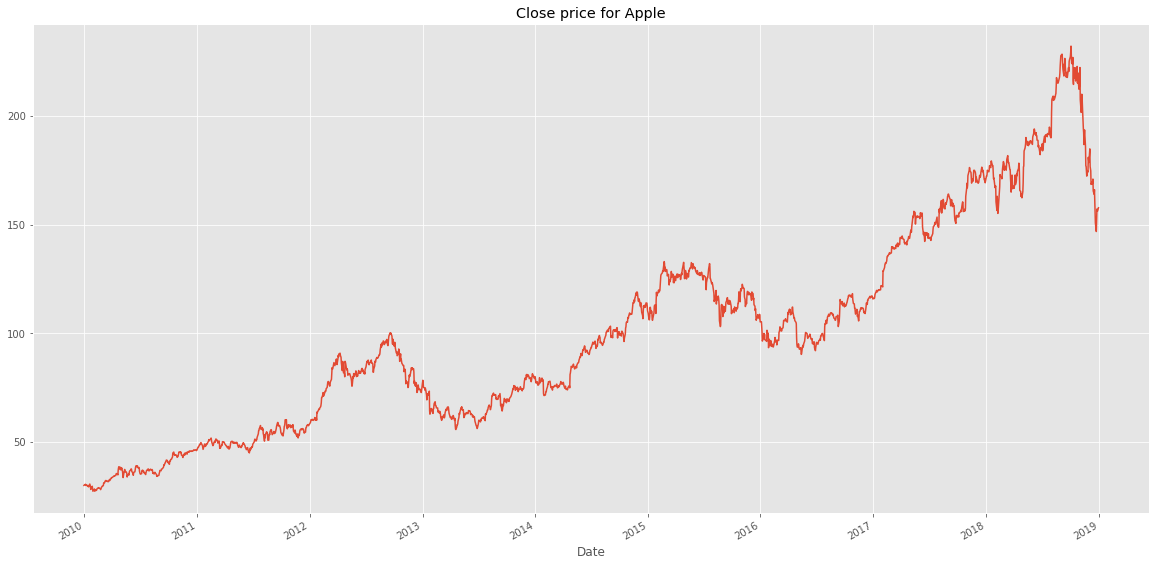

In [34]:
# date 타입을 datetime으로 변경
df["Date"] = pd.to_datetime(df["Date"])
df.info()

df.set_index("Date")
df.set_index("Date", inplace=True)
df

import matplotlib.pyplot as plt

# 종가 시각화
plt.style.use("ggplot")
df["Close"].plot(figsize=(20, 10))
plt.title("Close price for Apple")

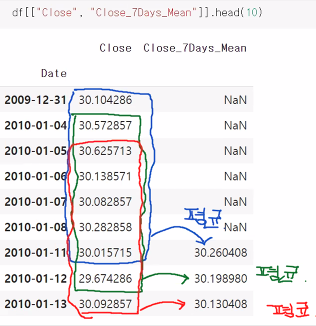

In [35]:
# 최근 7일간의 가지고 평균으로 주식 예측
df.rolling(7).mean().head(20)

# 7일간의 종가 평균
df["Close"].rolling(7).mean()


# 예측한 결과를 Close_7Days_Mean 컬럼에 추가
df["Close_7Days_Mean"] = df["Close"].rolling(7).mean()

# 맨위 10개
df[["Close", "Close_7Days_Mean"]].head(10)

# 맨마지막의 10개
df[["Close", "Close_7Days_Mean"]].tail(10)

,Close,Close_7Days_Mean
Date,,
2018-12-17,163.940002,168.027145
2018-12-18,166.070007,167.681431
2018-12-19,160.889999,166.437145
2018-12-20,156.830002,164.751430
2018-12-21,150.729996,162.127143
2018-12-24,146.830002,158.681429
2018-12-26,157.169998,157.494287
2018-12-27,156.149994,156.381428
2018-12-28,156.229996,154.975712


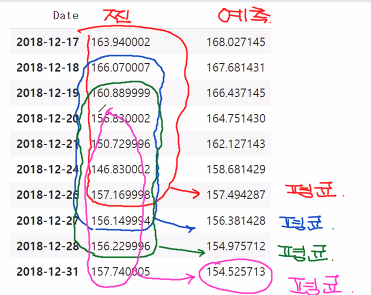

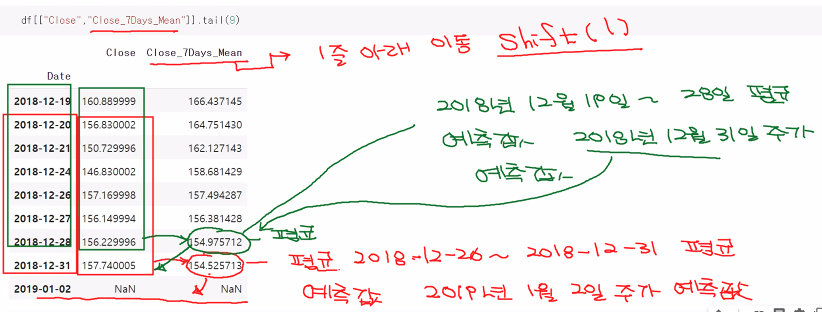

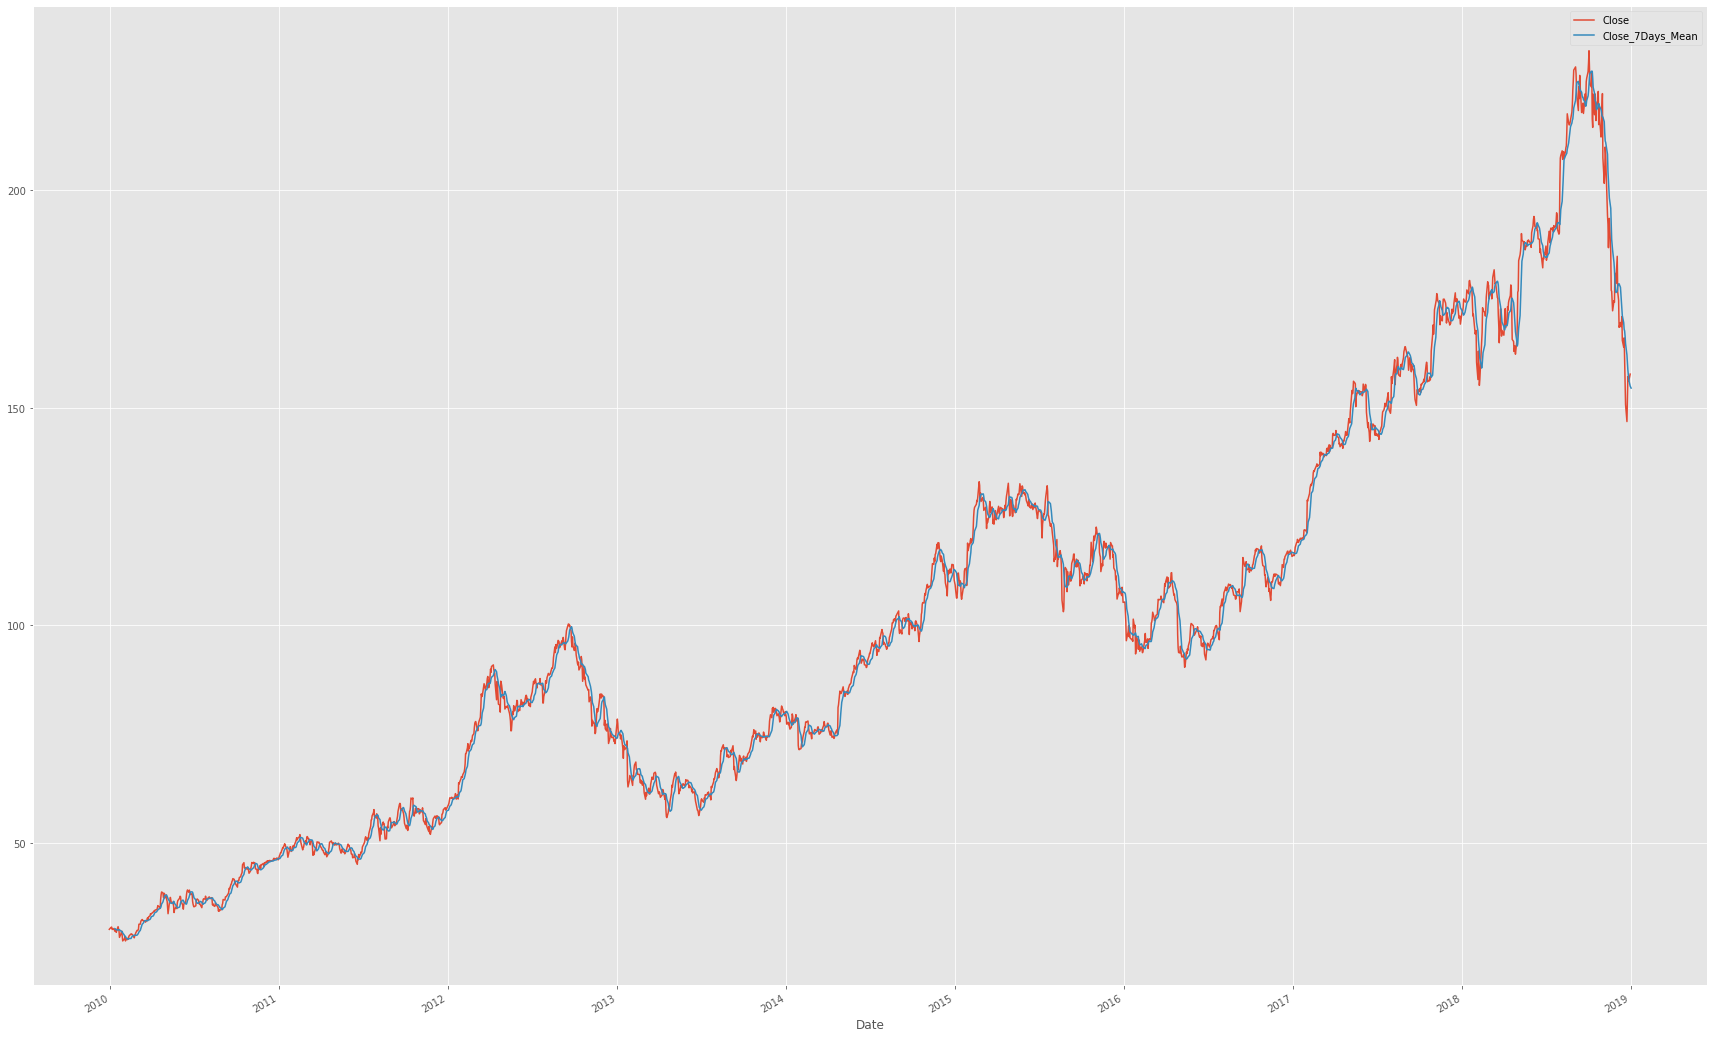

In [36]:
from datetime import datetime
import numpy as np
# 2019년 1월 2일 생성
last_day = datetime(2019, 1, 2)

# df에 새로운 행 추가 close = 0
df.loc[last_day, "Close"] = 0

# 0을 결측치로 변경
df.loc[last_day, "Close"] = np.nan

# 종가 7일의 평균을 close_7day_mean으로 저장
df["Close_7Days_Mean"] = df["Close"].rolling(7).mean()
df[["Close","Close_7Days_Mean"]]

# 마지막 9개
df[["Close","Close_7Days_Mean"]].tail(9)

# 한줄씩 밀어서 맞춤
df["Close_7Days_Mean"].shift(1)

# 한줄씩 밀어서 맞춘 내용을 새로 저장
df["Close_7Days_Mean"] = df["Close_7Days_Mean"].shift(1)

# 두가지만 보기
df[["Close", "Close_7Days_Mean"]]

df[["Close", "Close_7Days_Mean"]].tail(10)

# 시각화
df[["Close","Close_7Days_Mean"]].plot(figsize = (30, 20))



# resample()

시계열 데이터를 처리할 때 자주 하는것중 하나가 시간인덱스를 기준으로 resampling하는것

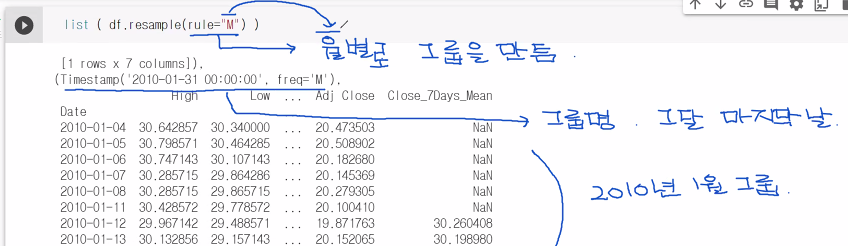

In [37]:
# rule="M" : 월 단위로 그룹을 만들어 주식 가격의 평균을 샘플링
df.resample(rule="M").mean()

,High,Low,Open,Close,Volume,Adj Close,Close_7Days_Mean
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,NaN
2010-01-31,30.175338,29.328647,29.915639,29.673609,1.995920e+08,19.871312,29.869921
2010-02-28,28.636466,28.046090,28.298872,28.399398,1.417905e+08,19.018021,28.370064
2010-03-31,32.097205,31.612174,31.828137,31.915838,1.321106e+08,21.372849,31.144508
2010-04-30,36.162381,35.445714,35.857347,35.878368,1.472277e+08,24.026409,35.004160
...,...,...,...,...,...,...,...
2018-09-30,224.530526,220.077895,222.331053,222.073685,3.573537e+07,221.301527,222.077144
2018-10-31,223.940871,217.874347,221.200001,220.845652,3.433689e+07,220.077763,222.012919
2018-11-30,193.949523,188.700475,191.819523,191.235714,4.577745e+07,191.062687,198.557415


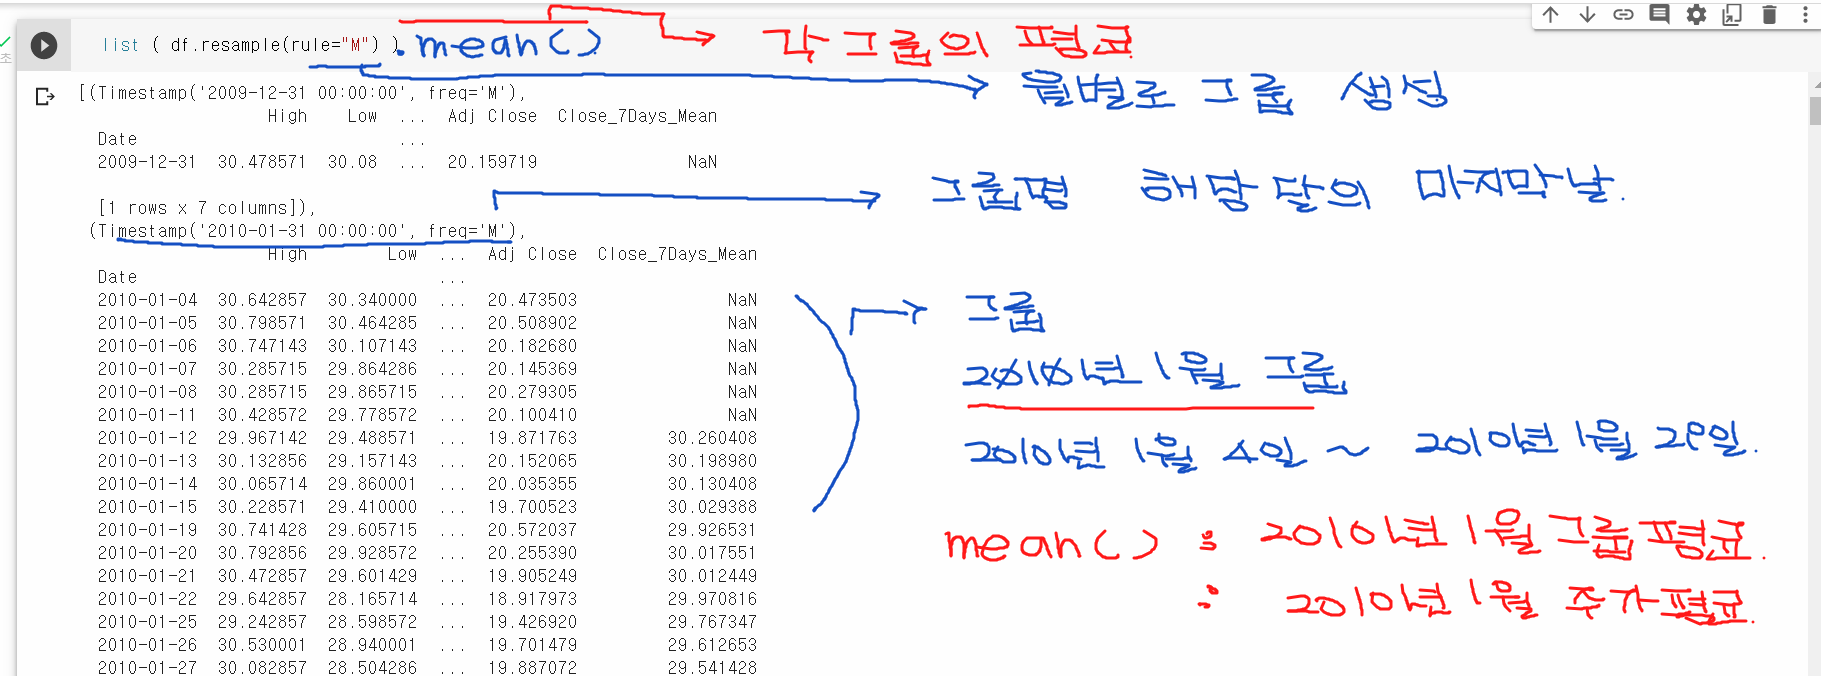

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

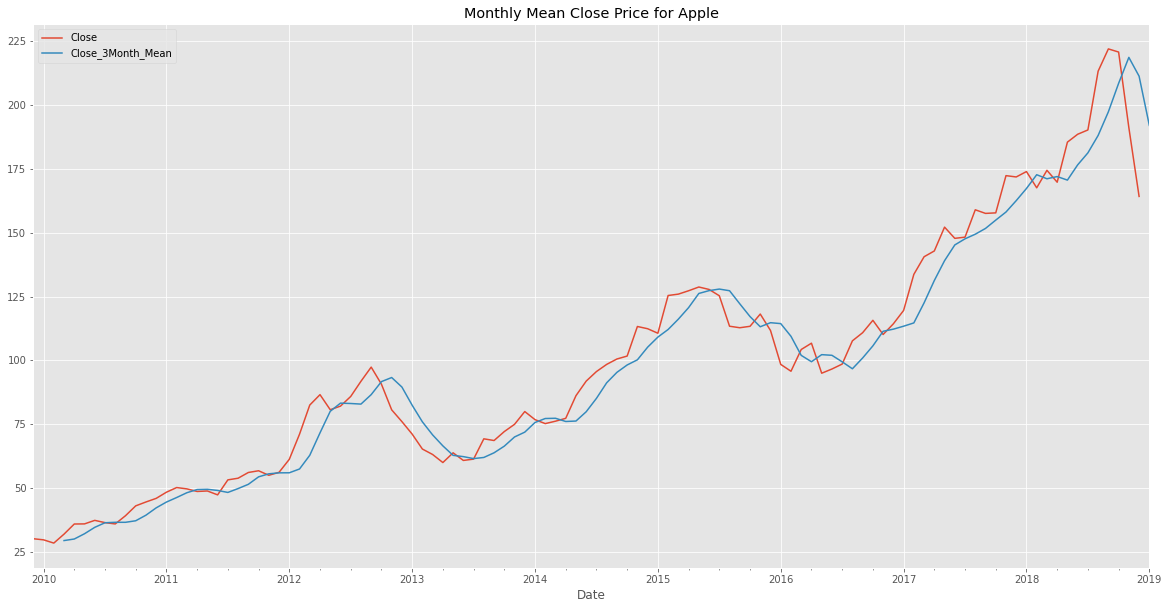

In [38]:
# 월별 그룹, 그룹명 -> 해당 달의 마지막날
list ( df.resample(rule="M") )

# 각 월별 그룹을 나누고 그룹의 평균,그룹명 -> 해당 달의 마지막날
# 2010년 월별 평균 df_monthly 저장
df_monthly = df.resample(rule="M").mean()

# 전처리
# [Close_7Days_Mean]컬럼 제거
# 모든줄, 마지막 칸을 제외한 열
df_monthly = df_monthly.iloc[ : , : -1]

df_monthly[["Close"]]

# 최근 3개월 간의 가격의 평균으로 주식을 예측
df_monthly.rolling(3).mean().head(20)

# 3개월간 종가의 평균을 계산
df_monthly['Close'].rolling(3).mean()

# 데이터프레임에 rolling mean 결과를 Close_3Month_Mean 컬럼에 추가
df_monthly['Close_3Month_Mean'] = df_monthly['Close'].rolling(3).mean()

df_monthly[['Close_3Month_Mean']].head(10)
df_monthly[['Close_3Month_Mean']].tail(10)

# 데이터프레임에 rolling mean결과를 1줄 아래로 이동하고 Close_3Month_Mean컬럼에 추가
df_monthly[["Close_3Month_Mean"]] = df_monthly[["Close"]].rolling(3).mean().shift(1)

df_monthly[["Close","Close_3Month_Mean"]].head(10)
df_monthly[["Close","Close_3Month_Mean"]].tail(10)

# 월별 주가 종가 시각화
df_monthly[["Close","Close_3Month_Mean"]].plot(figsize=(20,10))
plt.title('Monthly Mean Close Price for Apple')

In [39]:
# 월의 첫날을 그룹 이름으로 설정
list(df.resample(rule="MS"))

[(Timestamp('2009-12-01 00:00:00', freq='MS'),
                   High    Low  ...  Adj Close  Close_7Days_Mean
  Date                          ...                             
  2009-12-31  30.478571  30.08  ...  20.159719               NaN
  
  [1 rows x 7 columns]),
 (Timestamp('2010-01-01 00:00:00', freq='MS'),
                   High        Low  ...  Adj Close  Close_7Days_Mean
  Date                              ...                             
  2010-01-04  30.642857  30.340000  ...  20.473503               NaN
  2010-01-05  30.798571  30.464285  ...  20.508902               NaN
  2010-01-06  30.747143  30.107143  ...  20.182680               NaN
  2010-01-07  30.285715  29.864286  ...  20.145369               NaN
  2010-01-08  30.285715  29.865715  ...  20.279305               NaN
  2010-01-11  30.428572  29.778572  ...  20.100410               NaN
  2010-01-12  29.967142  29.488571  ...  19.871763         30.260408
  2010-01-13  30.132856  29.157143  ...  20.152065         30.

In [41]:
def first_day(group):
 # print("=" * 100)
 # print("group")
 # print("=" * 100)
 # print(group)
 # print("=" * 100)
 return group.iloc[0]

# agg(aggregate): DataFrame의 축(axis)을 기준으로 통계량을 집계(aggregate)하기 위한 함수
# 통계량(statistics): 합계(sum), 평균(mean), 분산(var), 표준편차(std),
# 최솟값(min), 최댓값(max), 중앙값(median), ...
# agg 함수는 집계가 목적이기 때문에 데이터 타입이 숫자 타입인 행/열에만
# 함수를 적용해서 계산한다

df.resample(rule = "MS").agg(first_day)

,High,Low,Open,Close,Volume,Adj Close,Close_7Days_Mean
Date,,,,,,,
2009-12-01,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN
2010-01-01,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,NaN
2010-02-01,28.000000,27.328571,27.481428,27.818571,187469100.0,18.629066,28.858367
2010-03-01,29.928572,29.350000,29.392857,29.855715,137523400.0,19.993259,28.762449
2010-04-01,34.104286,33.250000,33.915714,33.709999,150786300.0,22.574331,33.031020
...,...,...,...,...,...,...,...
2018-09-01,229.179993,226.630005,228.410004,228.360001,27390100.0,227.565979,220.704287
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,226.469803,221.682857
2018-11-01,222.360001,216.809998,219.050003,222.220001,58323200.0,221.447327,216.902858


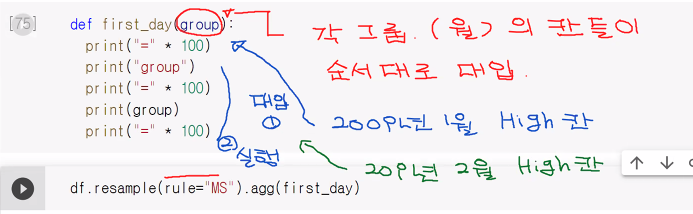

In [42]:
def first_day2(group):
  return group.iloc[0]

# 매월 첫날의 진짜 종가
df_start_day = df.resample(rule = "MS").agg(first_day2)[["Close"]]
df_start_day

,Close
Date,
2009-12-01,30.104286
2010-01-01,30.572857
2010-02-01,27.818571
2010-03-01,29.855715
2010-04-01,33.709999
...,...
2018-09-01,228.360001
2018-10-01,227.259995
2018-11-01,222.220001


In [43]:
# 2009년 12월 종가, 2019년 1월 정보 빼고 생성
df_start_day = df_start_day.iloc[1:-1]

# "Close" 컬럼이름 변경
df_start_day = df_start_day.rename(columns = {"Close":"Real Close"})
df_start_day

,Real Close
Date,
2010-01-01,30.572857
2010-02-01,27.818571
2010-03-01,29.855715
2010-04-01,33.709999
2010-05-01,38.049999
...,...
2018-08-01,201.500000
2018-09-01,228.360001
2018-10-01,227.259995


In [44]:
# Date는 그룹명 (월의 첫째날)
df.resample(rule = "MS").mean()[["Close"]]

,Close
Date,
2009-12-01,30.104286
2010-01-01,29.673609
2010-02-01,28.399398
2010-03-01,31.915838
2010-04-01,35.878368
...,...
2018-09-01,222.073685
2018-10-01,220.845652
2018-11-01,191.235714


In [45]:
# "Predict Close"컬럼에  해당 월의 종가평균의 값으로 채움
df_start_day["Predict Close"] = df.resample(rule = "MS").mean()[["Close"]]

# 2월에서 예측된 종가는 3월 종가를 예측하는것이니 한칸 이동
df_start_day["Predict Close"] = df_start_day["Predict Close"].shift(1)

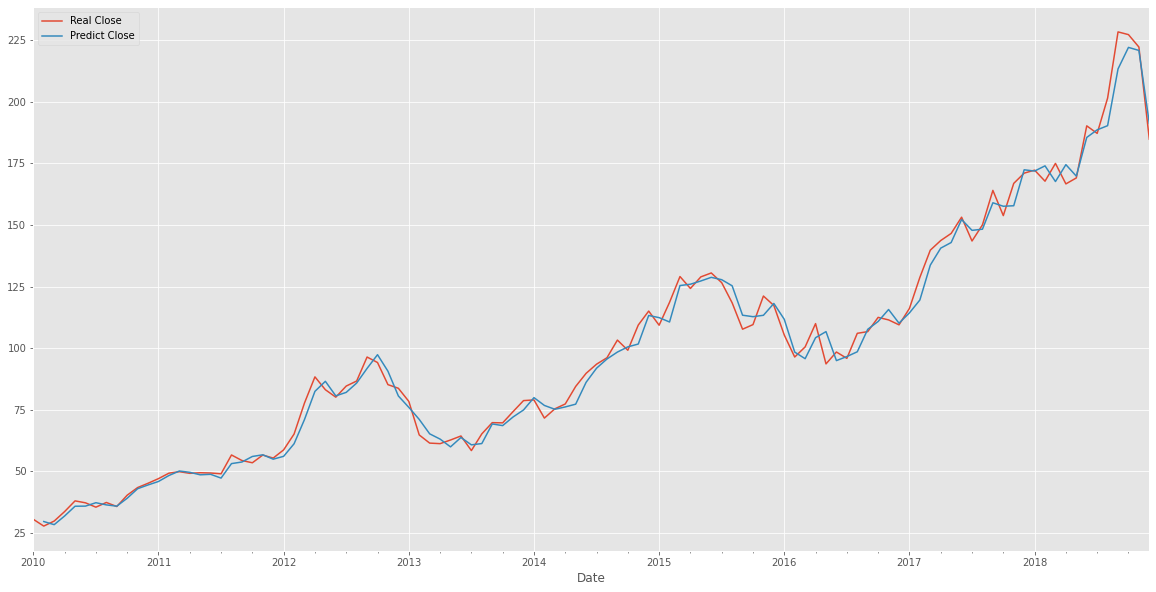

In [46]:
df_start_day.plot(figsize = (20, 10))

In [47]:
# 3개월 평균
df_start_day["Close_3Month_Mean"] = df_start_day.rolling(3).mean()["Predict Close"]

In [48]:
df_start_day.head(10)

,Real Close,Predict Close,Close_3Month_Mean
Date,,,
2010-01-01,30.572857,NaN,NaN
2010-02-01,27.818571,29.673609,NaN
2010-03-01,29.855715,28.399398,NaN
2010-04-01,33.709999,31.915838,29.996282
2010-05-01,38.049999,35.878368,32.064535
2010-06-01,37.261429,35.923071,34.572426
2010-07-01,35.497143,37.306493,36.369311
2010-08-01,37.407143,36.421428,36.550331
2010-09-01,35.761429,35.903312,36.543745


In [49]:
df_start_day["Close_3Month_Mean"]= df_start_day["Close_3Month_Mean"].shift(1)
df_start_day

,Real Close,Predict Close,Close_3Month_Mean
Date,,,
2010-01-01,30.572857,NaN,NaN
2010-02-01,27.818571,29.673609,NaN
2010-03-01,29.855715,28.399398,NaN
2010-04-01,33.709999,31.915838,NaN
2010-05-01,38.049999,35.878368,29.996282
...,...,...,...
2018-08-01,201.500000,190.311429,181.330844
2018-09-01,228.360001,213.346089,188.156559
2018-10-01,227.259995,222.073685,197.426315


In [50]:
df_start_day = df_start_day.rename(columns = {"Predict Close" : "Close_1Month_Mean"})
df_start_day

,Real Close,Close_1Month_Mean,Close_3Month_Mean
Date,,,
2010-01-01,30.572857,NaN,NaN
2010-02-01,27.818571,29.673609,NaN
2010-03-01,29.855715,28.399398,NaN
2010-04-01,33.709999,31.915838,NaN
2010-05-01,38.049999,35.878368,29.996282
...,...,...,...
2018-08-01,201.500000,190.311429,181.330844
2018-09-01,228.360001,213.346089,188.156559
2018-10-01,227.259995,222.073685,197.426315


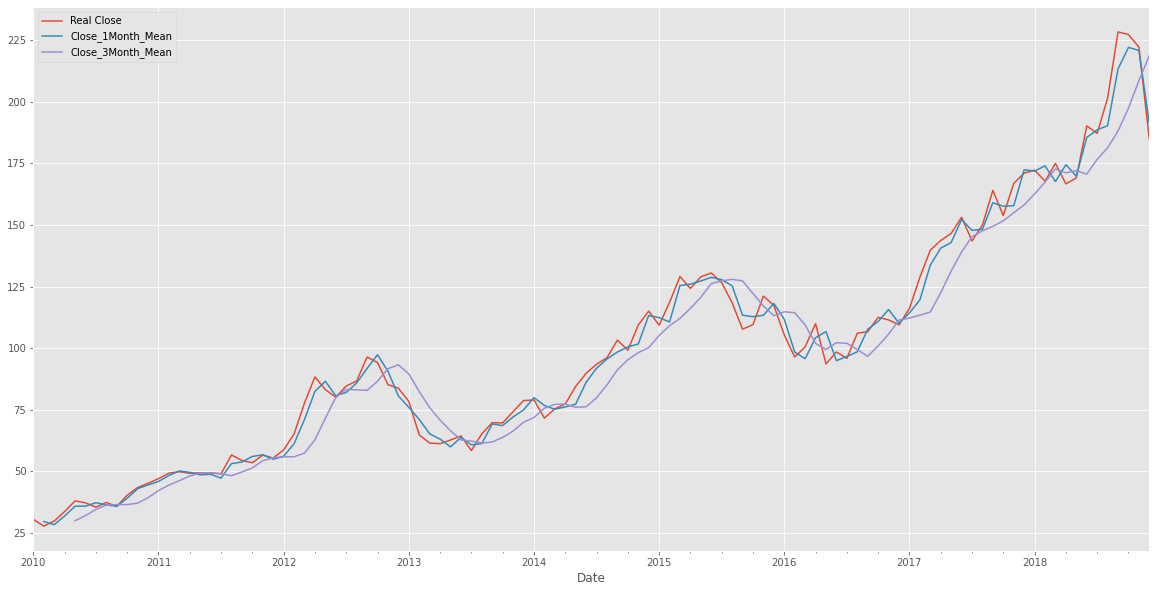

In [51]:
df_start_day.plot(figsize = (20, 10))

# 실습

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [53]:
plt.style.use("ggplot")

Text(0.5, 1.0, 'Close Price for Apple')

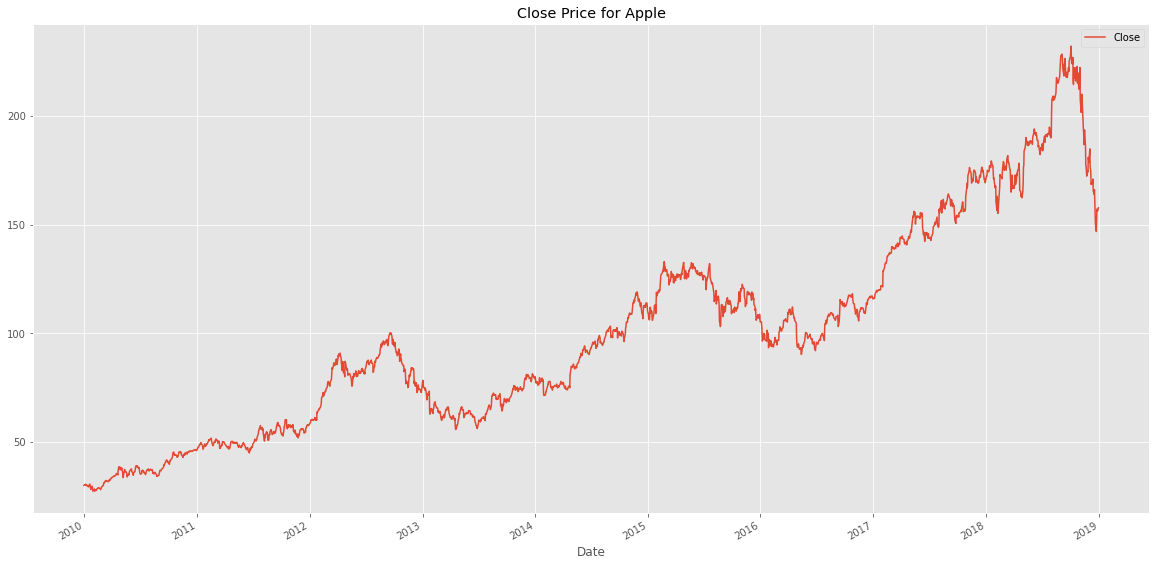

In [54]:
plt.style.use("ggplot")
apple_path = '/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/apple_stock.csv'

# csv 로드
df = pd.read_csv(apple_path)

# Date칼럼 date타입으로 형 변화
df["Date"] = pd.to_datetime(df["Date"])

# Date칼럼 index설정
df = df.set_index("Date")

# Close컬럼 그래프로 그리기
df[['Close']].plot(figsize= (20, 10))
plt.title("Close Price for Apple")

In [55]:
# 7일간 가격 평균
df.rolling(7).mean().head(20)

# 7일간 종가 평균
df[["Close"]].rolling(7).mean()

# rolling 결과를 새컬럼 Close_7Days_Mean에 추가
df["Close_7Days_Mean"] = df['Close'].rolling(7).mean()

df[["Close", "Close_7Days_Mean"]].head(10)

# 날짜 생성
last_day = datetime(2019,1,2)

# 생성한 날짜 Row 추가
df.loc[last_day, "Close"] = np.nan

In [56]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,Close_7Days_Mean
Date,,,,,,,
2018-12-18,167.529999,164.389999,165.380005,166.070007,33841500.0,166.070007,167.681431
2018-12-19,167.449997,159.089996,166.000000,160.889999,49047300.0,160.889999,166.437145
2018-12-20,162.110001,155.300003,160.399994,156.830002,64773000.0,156.830002,164.751430
2018-12-21,158.160004,149.630005,156.860001,150.729996,95744600.0,150.729996,162.127143
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002,158.681429
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,157.494287
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994,156.381428
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996,154.975712
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005,154.525713


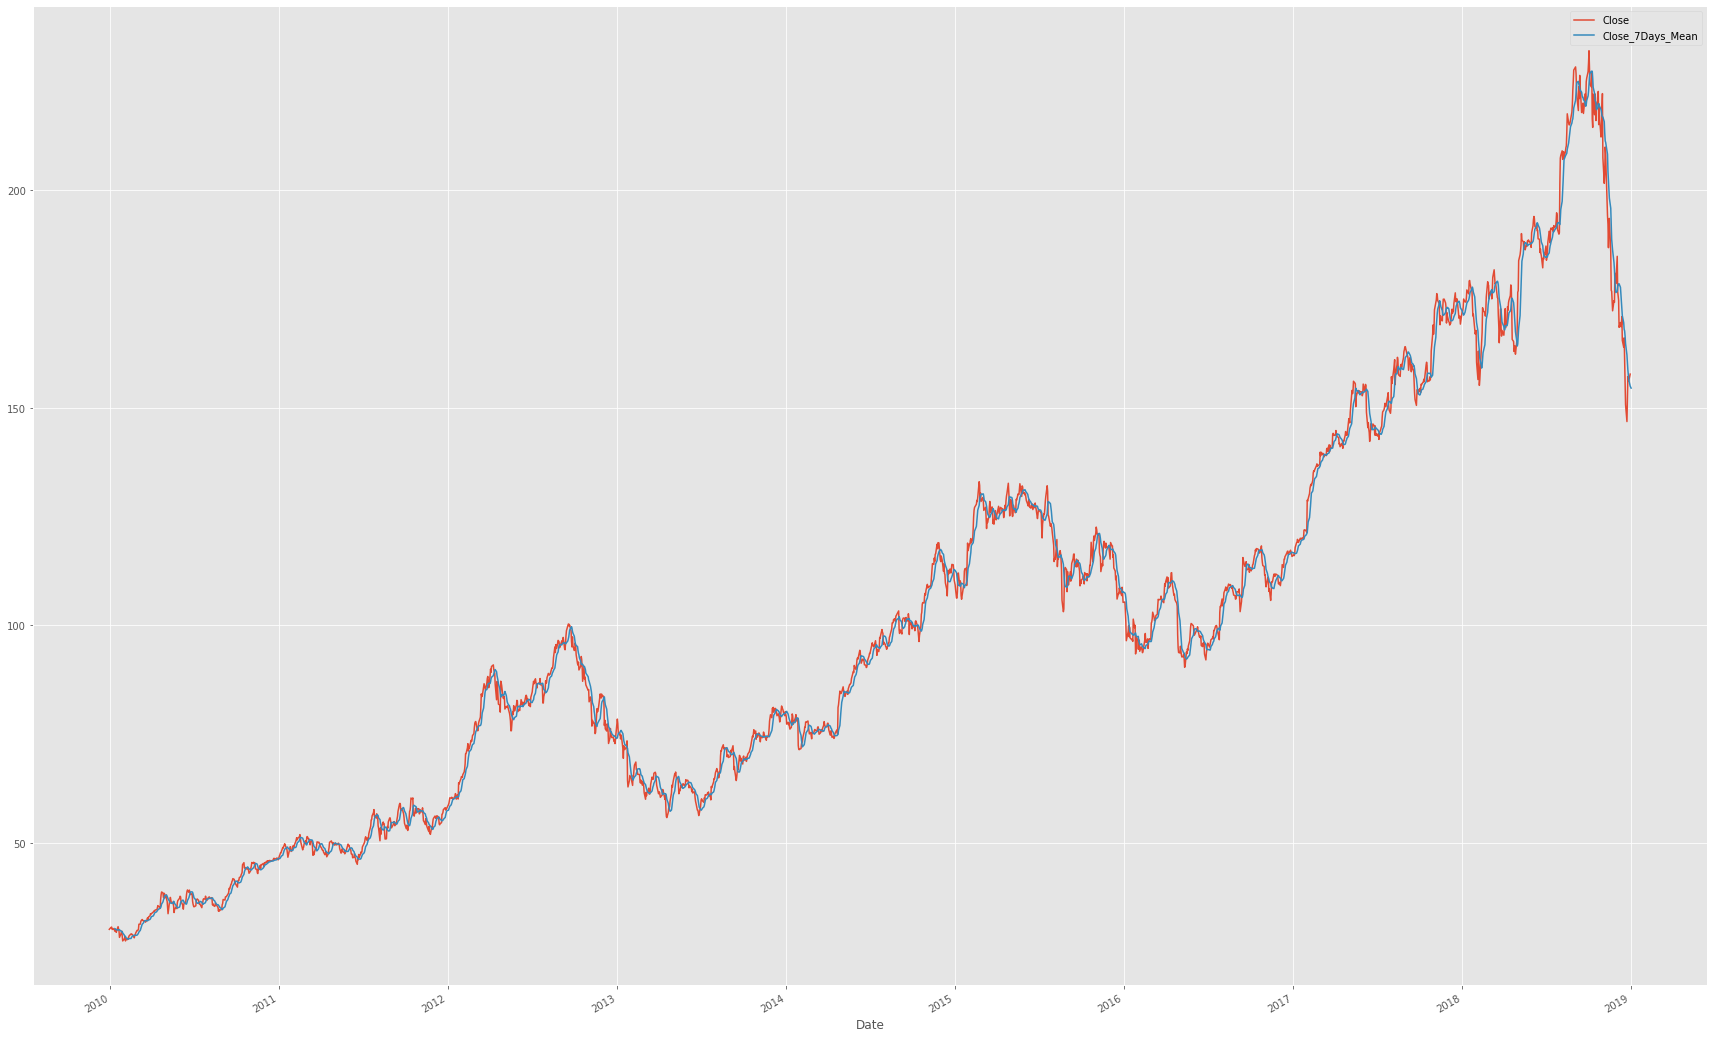

In [57]:
# 7일 평균을 한칸씩 아래로 이동하고 추가
df['Close_7Days_Mean'] = df['Close'].rolling(7).mean().shift(1)

# 시각화
df[["Close", "Close_7Days_Mean"]].plot(figsize=(30,20))



In [58]:
df_monthly = df.resample(rule = 'M').mean()
df_monthly

,High,Low,Open,Close,Volume,Adj Close,Close_7Days_Mean
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,NaN
2010-01-31,30.175338,29.328647,29.915639,29.673609,1.995920e+08,19.871312,29.869921
2010-02-28,28.636466,28.046090,28.298872,28.399398,1.417905e+08,19.018021,28.370064
2010-03-31,32.097205,31.612174,31.828137,31.915838,1.321106e+08,21.372849,31.144508
2010-04-30,36.162381,35.445714,35.857347,35.878368,1.472277e+08,24.026409,35.004160
...,...,...,...,...,...,...,...
2018-09-30,224.530526,220.077895,222.331053,222.073685,3.573537e+07,221.301527,222.077144
2018-10-31,223.940871,217.874347,221.200001,220.845652,3.433689e+07,220.077763,222.012919
2018-11-30,193.949523,188.700475,191.819523,191.235714,4.577745e+07,191.062687,198.557415


In [59]:
df_monthly = df_monthly.iloc[:, :-1]
df_monthly

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719
2010-01-31,30.175338,29.328647,29.915639,29.673609,1.995920e+08,19.871312
2010-02-28,28.636466,28.046090,28.298872,28.399398,1.417905e+08,19.018021
2010-03-31,32.097205,31.612174,31.828137,31.915838,1.321106e+08,21.372849
2010-04-30,36.162381,35.445714,35.857347,35.878368,1.472277e+08,24.026409
...,...,...,...,...,...,...
2018-09-30,224.530526,220.077895,222.331053,222.073685,3.573537e+07,221.301527
2018-10-31,223.940871,217.874347,221.200001,220.845652,3.433689e+07,220.077763
2018-11-30,193.949523,188.700475,191.819523,191.235714,4.577745e+07,191.062687


Text(0.5, 1.0, 'Monthly Mean Close Prcie for Apple')

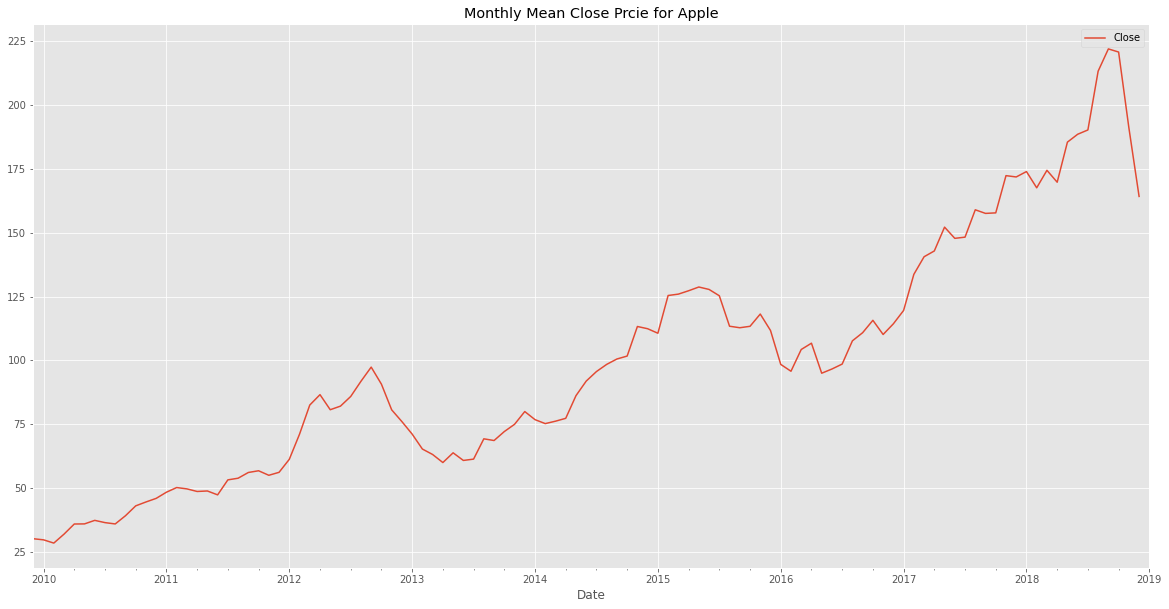

In [60]:
df_monthly[["Close"]].plot(figsize = (20, 10))
plt.title("Monthly Mean Close Prcie for Apple")

In [61]:
df_monthly['Close_3Month_Mean'] = df_monthly["Close"].rolling(3).mean()
df_monthly

,High,Low,Open,Close,Volume,Adj Close,Close_3Month_Mean
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,NaN
2010-01-31,30.175338,29.328647,29.915639,29.673609,1.995920e+08,19.871312,NaN
2010-02-28,28.636466,28.046090,28.298872,28.399398,1.417905e+08,19.018021,29.392431
2010-03-31,32.097205,31.612174,31.828137,31.915838,1.321106e+08,21.372849,29.996282
2010-04-30,36.162381,35.445714,35.857347,35.878368,1.472277e+08,24.026409,32.064535
...,...,...,...,...,...,...,...
2018-09-30,224.530526,220.077895,222.331053,222.073685,3.573537e+07,221.301527,208.577068
2018-10-31,223.940871,217.874347,221.200001,220.845652,3.433689e+07,220.077763,218.755142
2018-11-30,193.949523,188.700475,191.819523,191.235714,4.577745e+07,191.062687,211.385017


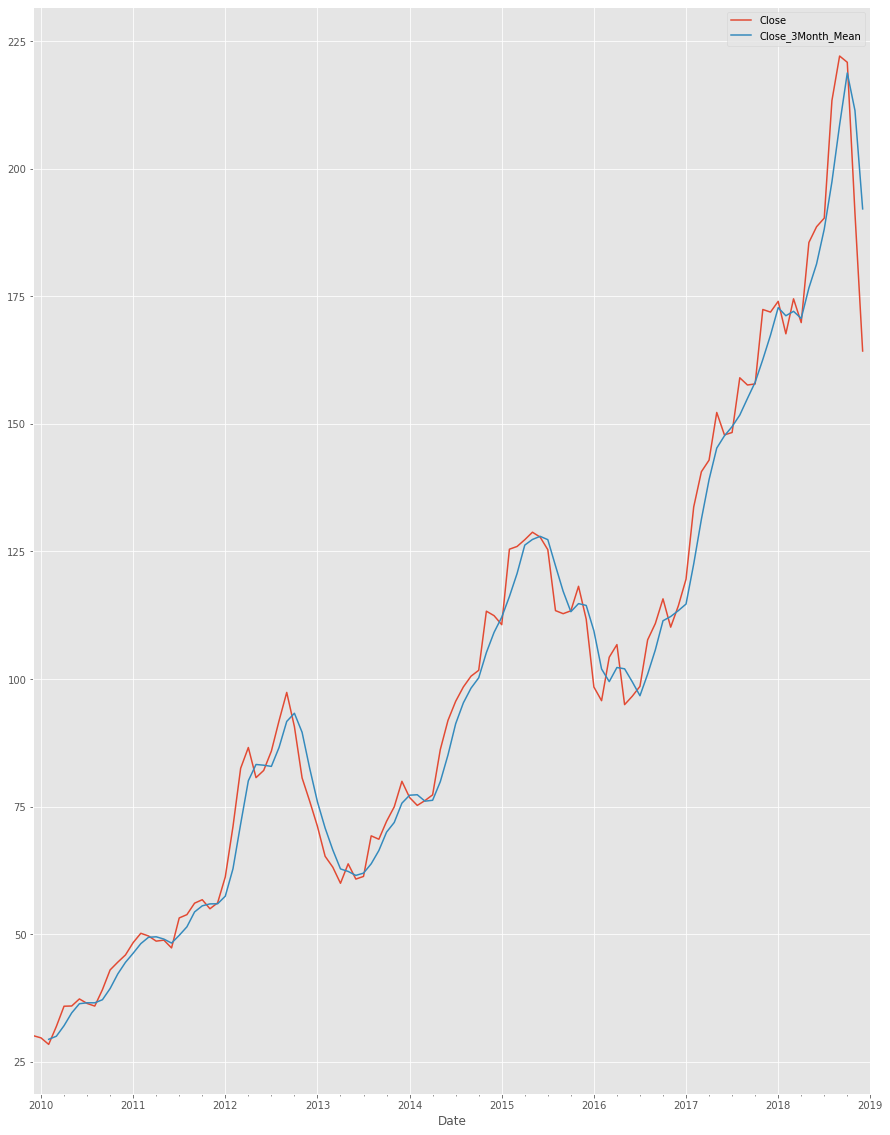

In [62]:
df_monthly[["Close","Close_3Month_Mean"]].plot(figsize=(15,20))